In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data_feature_engineered.csv")
print(df)

           text_id                                          full_text  \
0     0016926B079C  i think that students would benefit from learn...   
1     0022683E9EA5  when a problem is a change you have to let it ...   
2     00299B378633  dear, principal  if u change the school policy...   
3     003885A45F42  the best time in life is when you become yours...   
4     0049B1DF5CCC  small act of kindness can impact in other peop...   
...            ...                                                ...   
3926  FFD29828A873  i believe using cellphones in class for educat...   
3927  FFD9A83B0849  working alone, students do not have to argue w...   
3928  FFDC4011AC9C  "a problem is a chance for you to do your best...   
3929  FFE16D704B16  many people disagree with albert schweitzer's ...   
3930  FFED00D6E0BD  do you think that failure is the main thing fo...   

      cohesion  syntax  vocabulary  phraseology  grammar  conventions  \
0          3.5     3.5         3.0          3.0   

In [18]:
label_cols = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

In [19]:
feature_cols = df.columns.difference(['text_id', 'full_text'] + label_cols).tolist()

In [20]:
df = df.dropna()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3904 entries, 0 to 3930
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text_id            3904 non-null   object 
 1   full_text          3904 non-null   object 
 2   cohesion           3904 non-null   float64
 3   syntax             3904 non-null   float64
 4   vocabulary         3904 non-null   float64
 5   phraseology        3904 non-null   float64
 6   grammar            3904 non-null   float64
 7   conventions        3904 non-null   float64
 8   n_capital          3904 non-null   float64
 9   n_punct            3904 non-null   float64
 10  n_unique           3904 non-null   float64
 11  n_unique_n_stop    3904 non-null   float64
 12  n_n_word           3904 non-null   float64
 13  noun_phrase_count  3904 non-null   float64
 14  PRON               3904 non-null   float64
 15  VERB               3904 non-null   float64
 16  SCONJ              3904 non-n

## Feature Importance for 'Cohesion'

In [22]:
X = df[feature_cols]
y = df['cohesion']

# Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



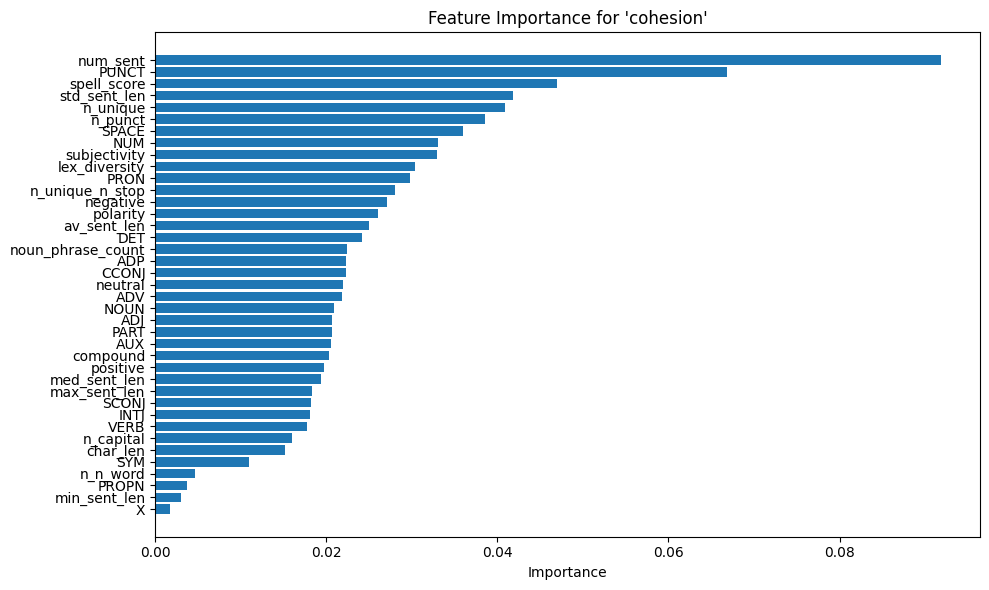

In [23]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': importances
}).sort_values(by='importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance for 'cohesion'")
plt.tight_layout()
plt.show()

## Feature Importance for all lables

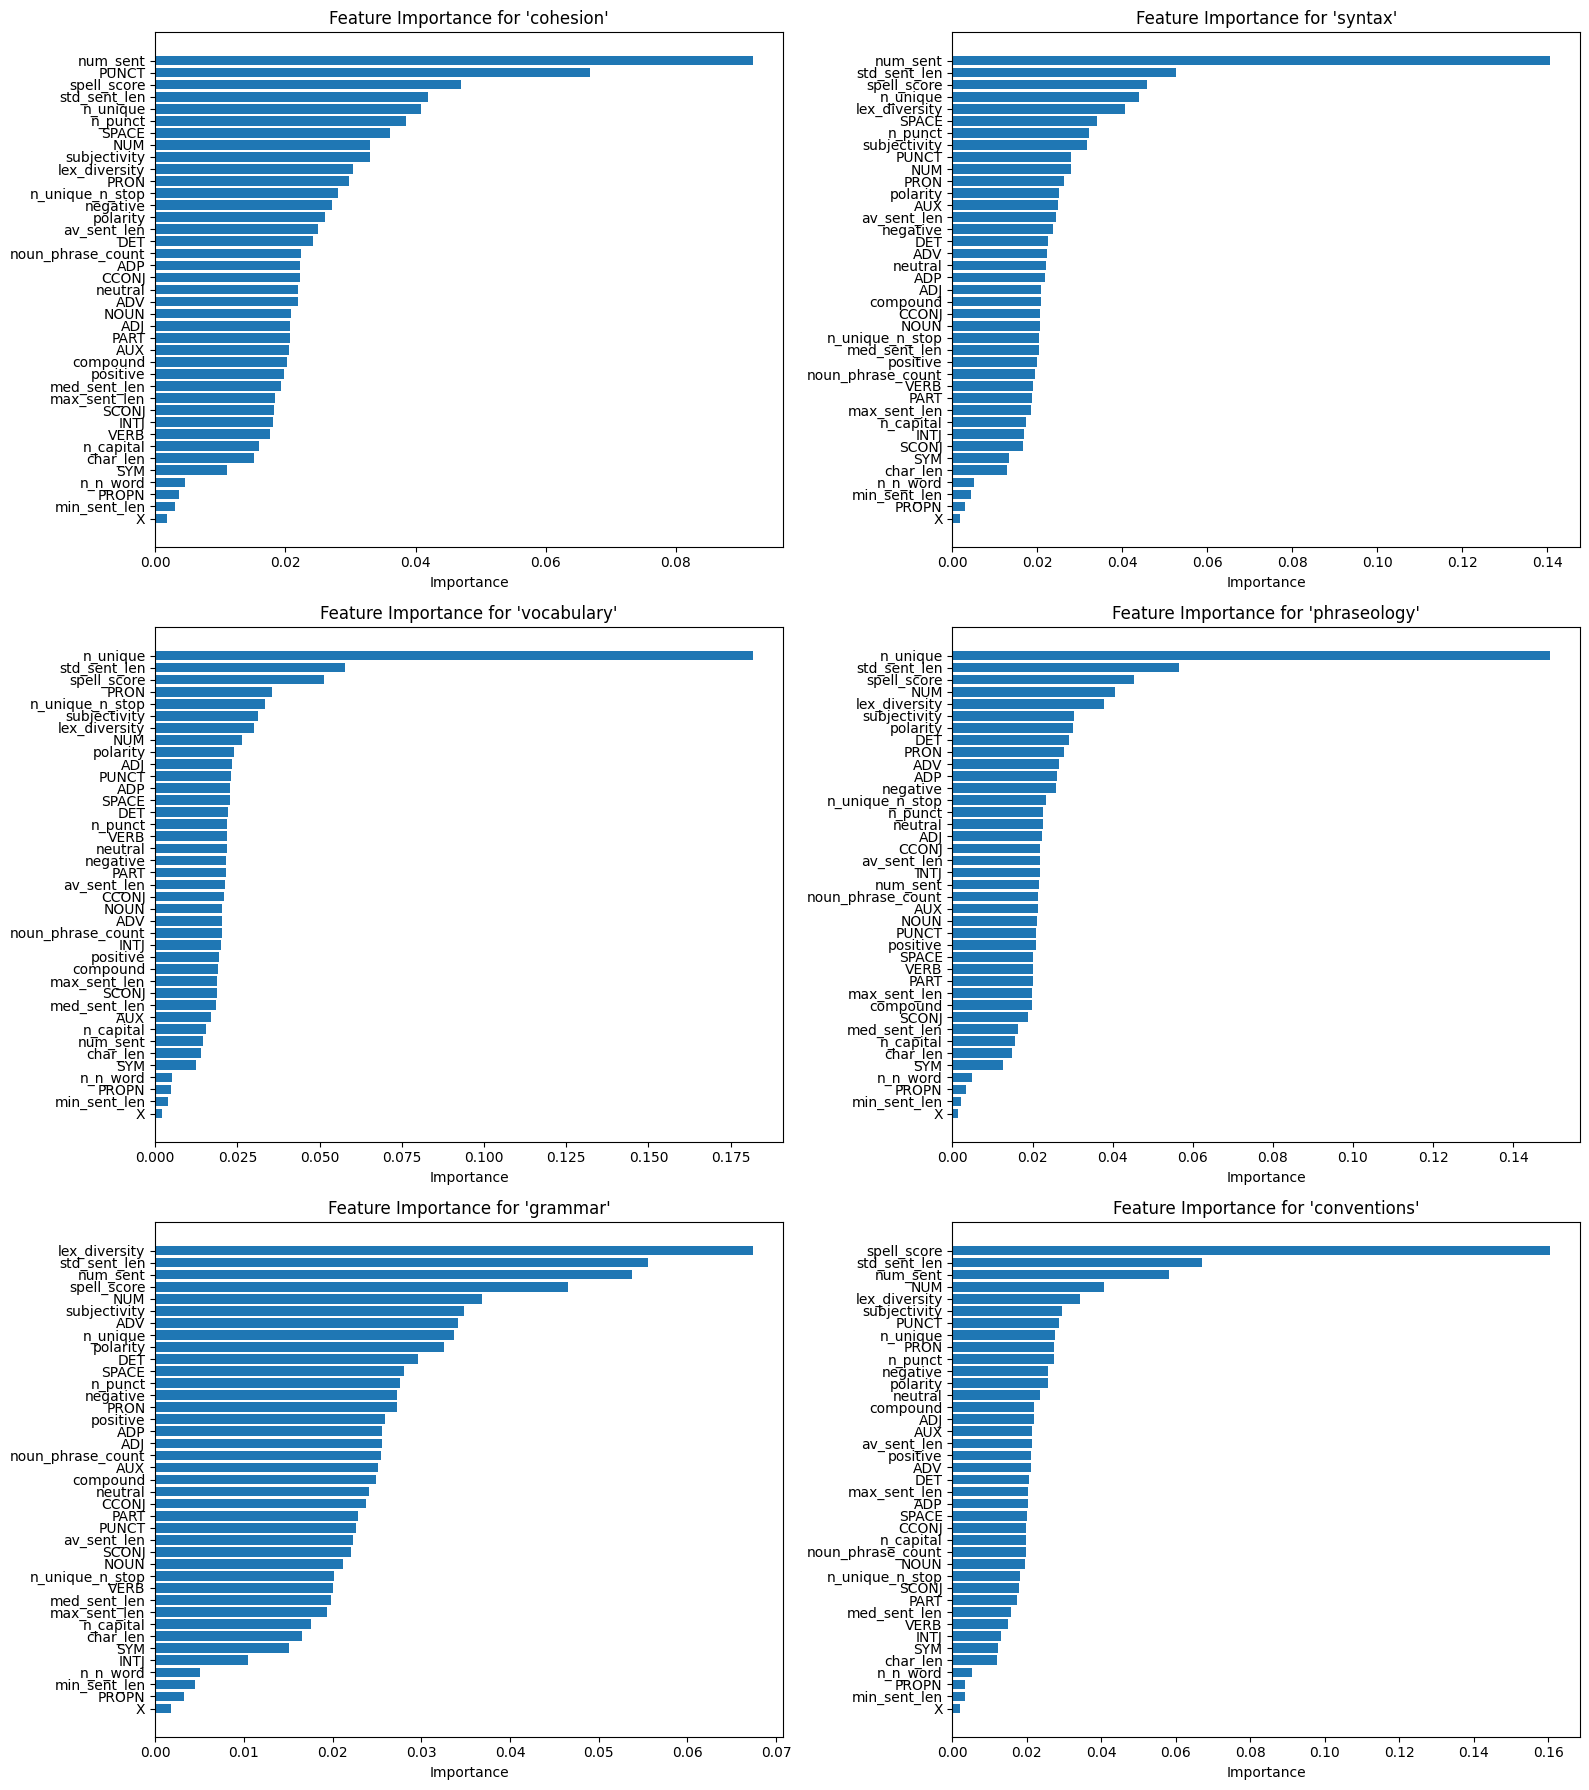

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

feature_importance_dict = {}
# iterate over all lables
for i, label in enumerate(label_cols):
    y = df[label]
    
    # Train/Test-Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model training
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Feature Importance
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': feature_cols,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    feature_importance_dict[label] = feature_importance_df

    ax = axes[i]
    ax.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    ax.set_title(f"Feature Importance for '{label}'")
    ax.invert_yaxis()
    ax.set_xlabel("Importance")


plt.tight_layout()
plt.show()

In [25]:
combined_importance_df = pd.DataFrame({'feature': feature_cols})
for label, df_imp in feature_importance_dict.items():
    combined_importance_df[label] = df_imp.set_index('feature').reindex(feature_cols).fillna(0).values

# Sum over all lables
combined_importance_df['total_importance'] = combined_importance_df[label_cols].sum(axis=1)

combined_importance_df = combined_importance_df.sort_values(by='total_importance', ascending=False)
print(combined_importance_df.head())

          feature  cohesion    syntax  vocabulary  phraseology   grammar  \
28       n_unique  0.040877  0.044002    0.181790     0.149214  0.033710   
36    spell_score  0.047027  0.045714    0.051296     0.045319  0.046515   
33       num_sent  0.091832  0.140637    0.014566     0.021628  0.053746   
37   std_sent_len  0.041881  0.052572    0.057699     0.056606  0.055547   
21  lex_diversity  0.030396  0.040646    0.029944     0.037923  0.067376   

    conventions  total_importance  
28     0.027484          0.477077  
36     0.160527          0.396397  
33     0.058089          0.380498  
37     0.067071          0.331376  
21     0.034211          0.240497  


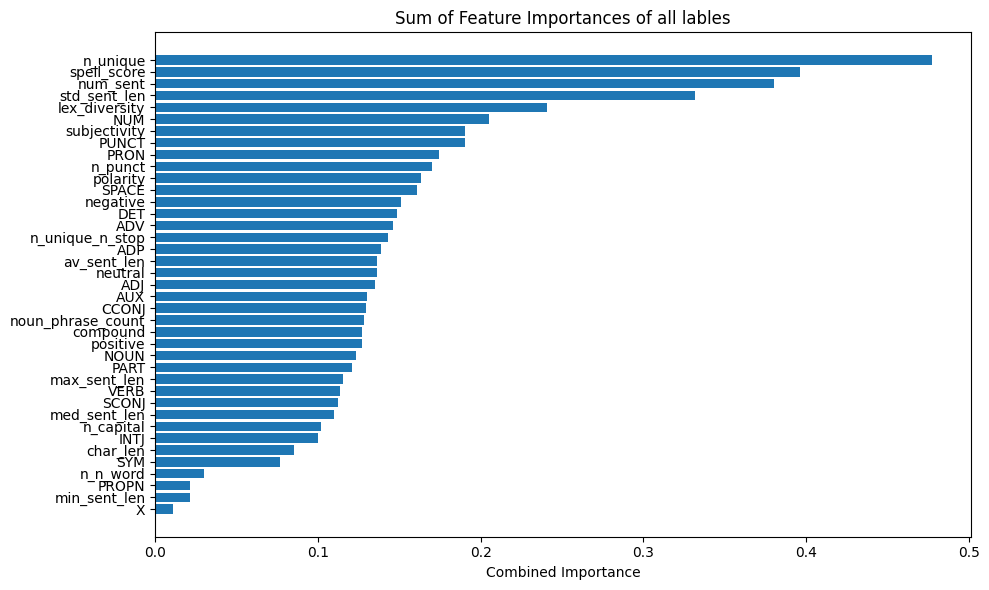

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(combined_importance_df['feature'], combined_importance_df['total_importance'])
plt.gca().invert_yaxis()
plt.xlabel("Combined Importance")
plt.title("Sum of Feature Importances of all lables")
plt.tight_layout()
plt.show()